In [1]:
%matplotlib inline
import pandas
import numpy
import matplotlib.pyplot as plt

In [2]:
from figures import JobTimePlots

# Read Simulation Time Data

In [3]:
sim_out_data = pandas.read_csv("data/simulation/out.txt")
sim_out_data.columns = [i.replace(" ", "") for i in sim_out_data.columns]
sim_out_data.head()

,JobName,Success,Timestart,timeschedule,TimestartExec,TimeEndExec,Tier,Type
0,141647926,1,861,1000.011346,1000.011357,1172.301357,NIKHEF-ELPROD,MCStripping
1,141647872,1,717,1000.013122,1000.013132,1298.893132,RAL-LCG2,MCStripping
2,141647925,1,860,1000.013479,1000.013587,1424.063587,RU-RDIG,MCStripping
3,141647995,1,1217,2000.011271,2000.011478,2267.721478,CERN-PROD,MCStripping
4,141648046,1,1458,2000.011510,2000.011521,2320.031521,FZK-LCG2,MCStripping


# Read Real Time Data

In [4]:
real_out_data = pandas.read_csv('data/real/real_out.txt')
is_not_none = (real_out_data.values != 'None').cumprod(axis=1)[:, -1]
real_out_data = real_out_data.iloc[is_not_none == 1]
real_out_data.head()

,JobName,SubmissionTime,StartExecTime,EndExecTime,WallClockTime,TotalCPUTime,JobType,Tier
0,141688832,1475309580,1475310044.0,1475347814.0,37757.996412,33339.05,DataStripping,RAL-LCG2
1,141688833,1475309581,1475310048.0,1475346524.0,36464.665066,34800.88,DataStripping,RAL-LCG2
2,141688834,1475309581,1475310136.0,1475346309.0,36154.8810921,33842.75,DataStripping,RAL-LCG2
3,141688835,1475309581,1475310057.0,1475349440.0,39369.956562,37084.31,DataStripping,RAL-LCG2
4,141688836,1475309581,1475310335.0,1475349830.0,39478.106035,38007.07,DataStripping,RAL-LCG2


# Job Time Plots

In [5]:
jtp = JobTimePlots(sim_out_data, real_out_data)

### Job CPU Time Plot

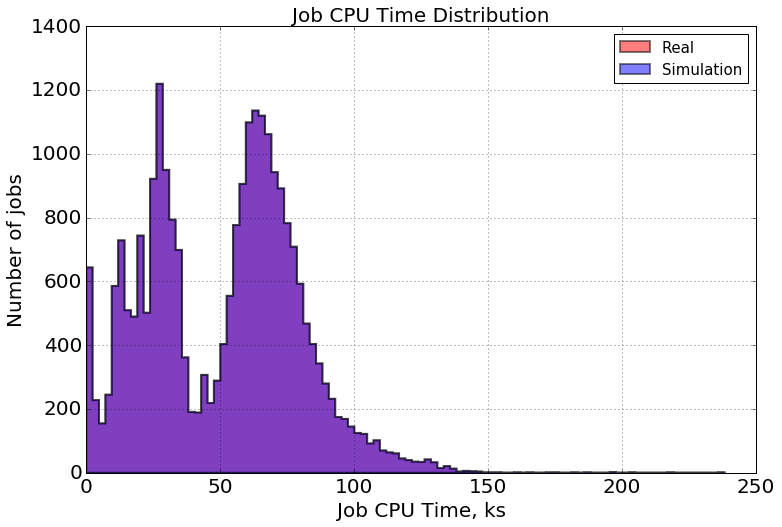

In [6]:
jtp.job_cpu_time()

### Job Execution Time Plots
Job execution time = job end execution time - job start execution time

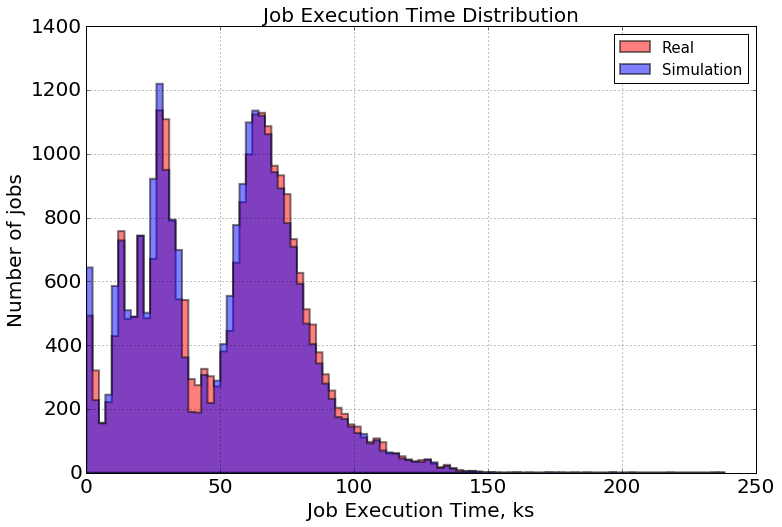

In [7]:
jtp.job_exec_time()

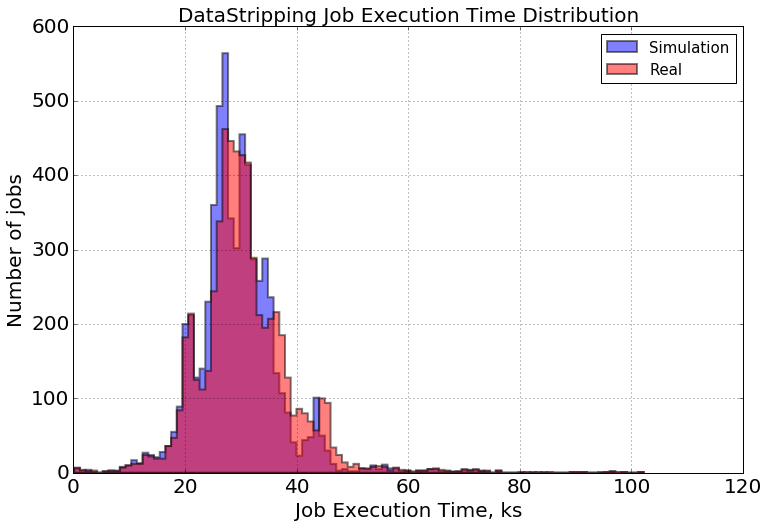

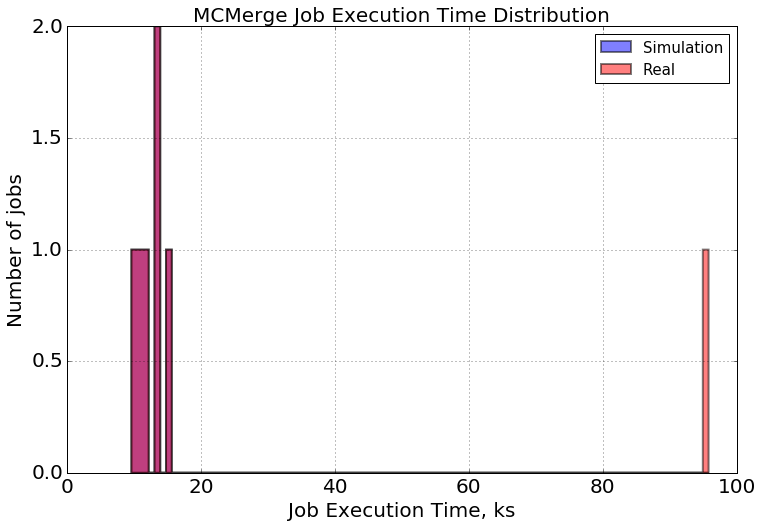

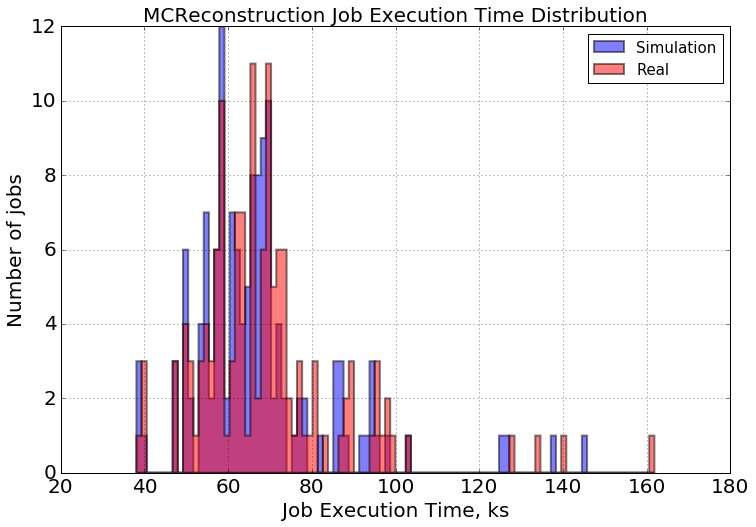

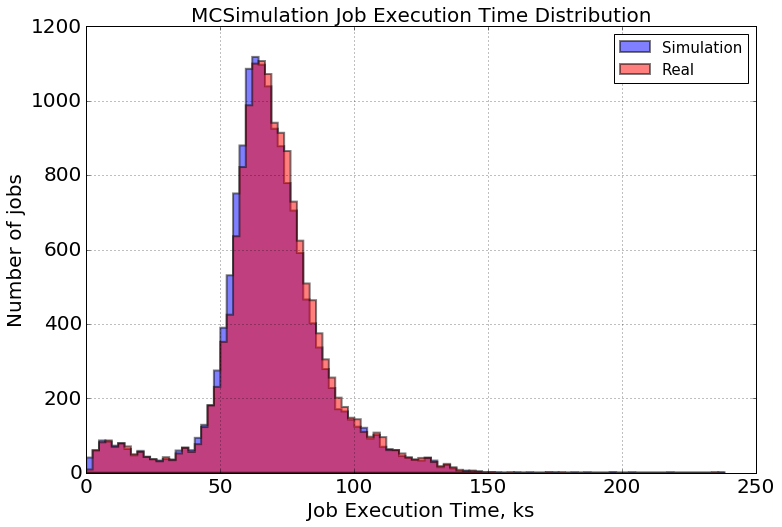

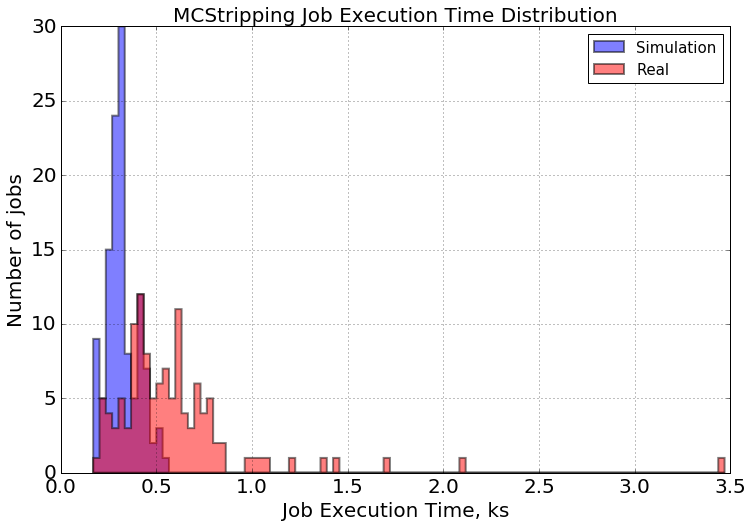

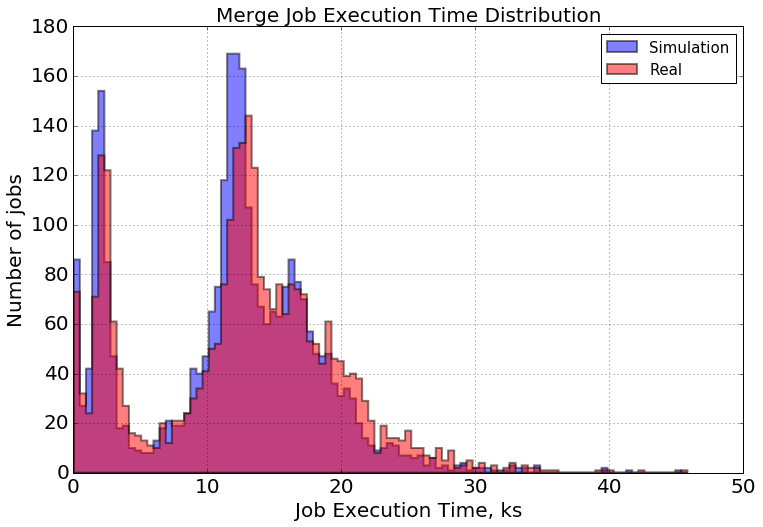

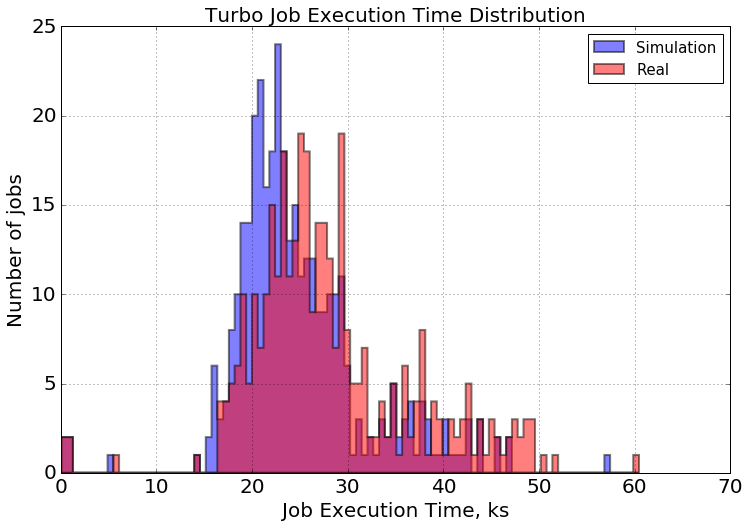

In [8]:
jtp.job_exec_time_by_jobtype()

### Job Wait Time Plots
Job wait time = job start execution time - job submission time

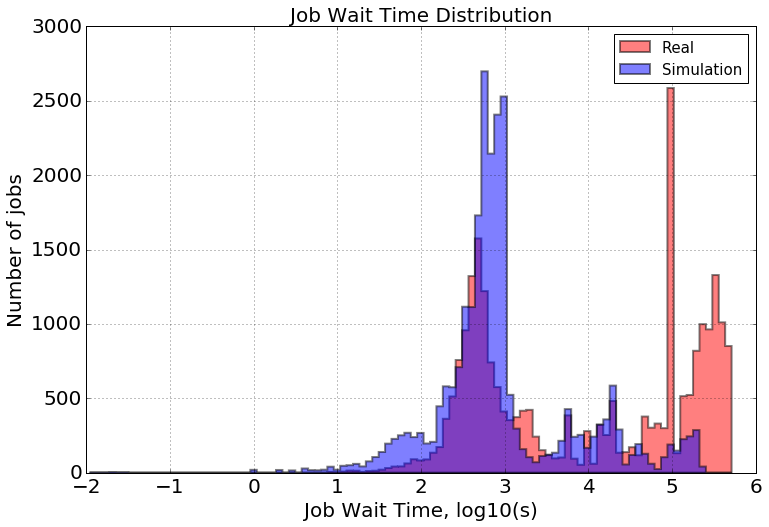

In [9]:
jtp.job_wait_time()

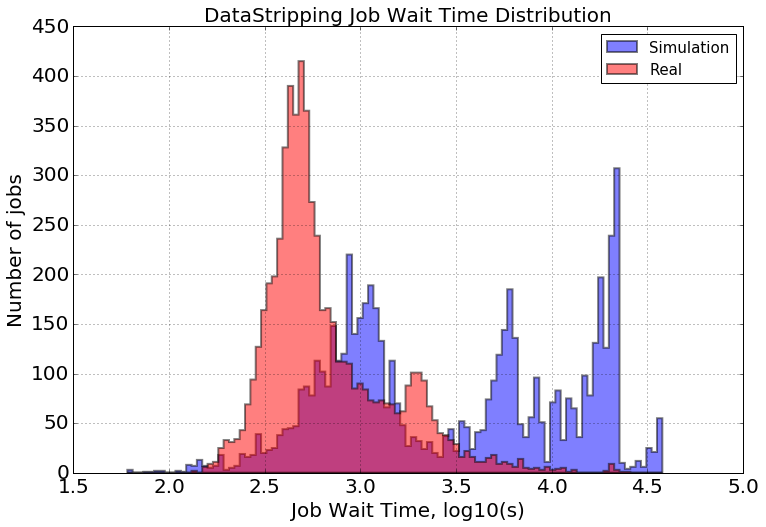

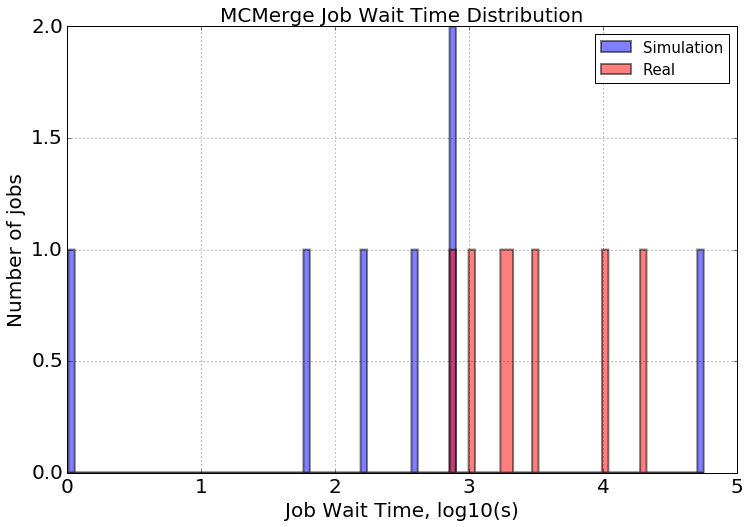

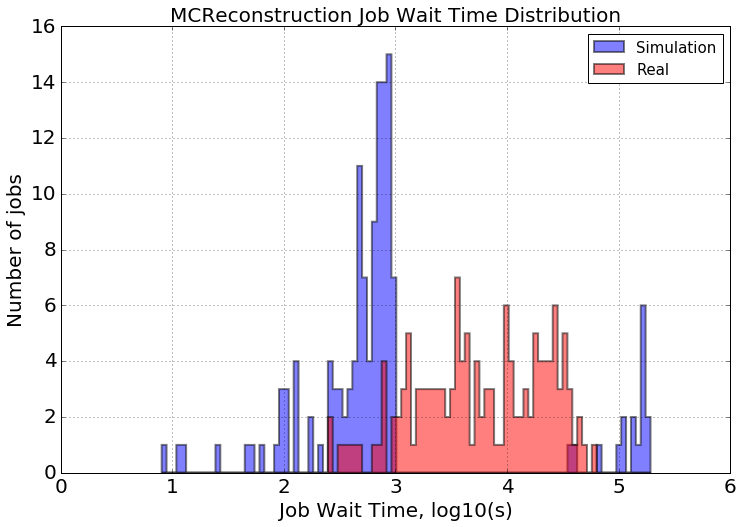

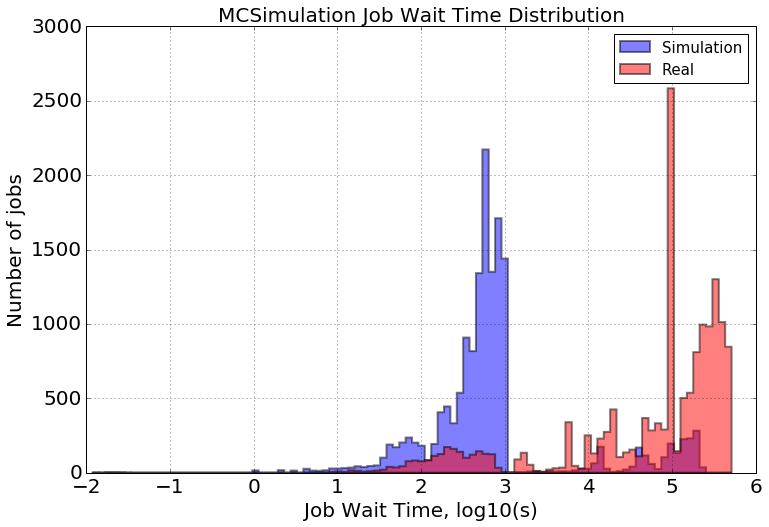

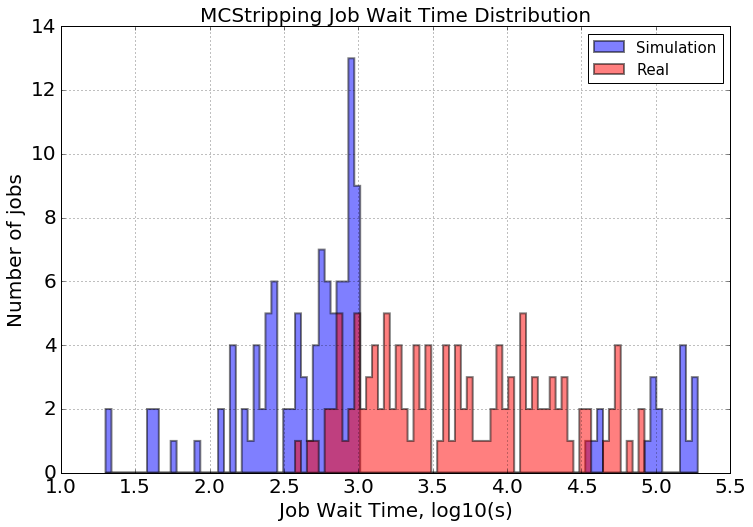

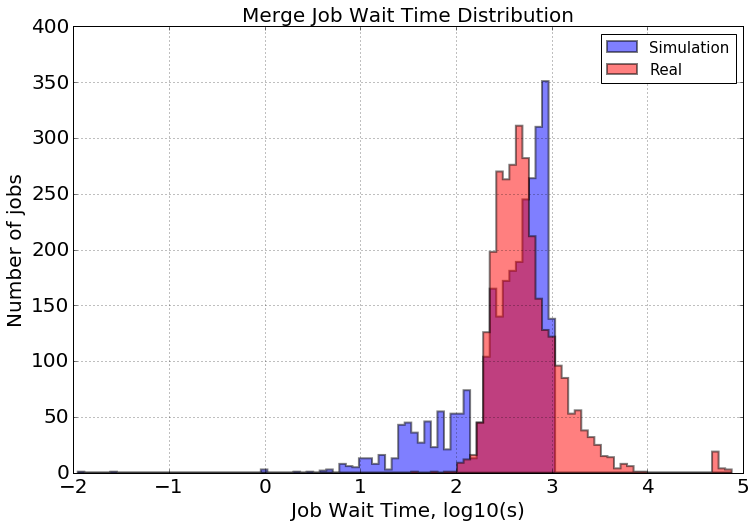

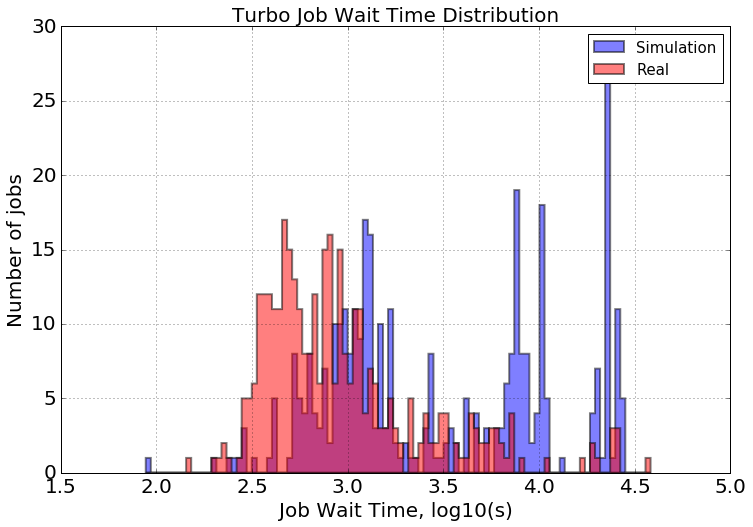

In [10]:
jtp.job_wait_time_by_jobtype()

### Job Life Time Plots
Job life time = job end execution time - job submission time

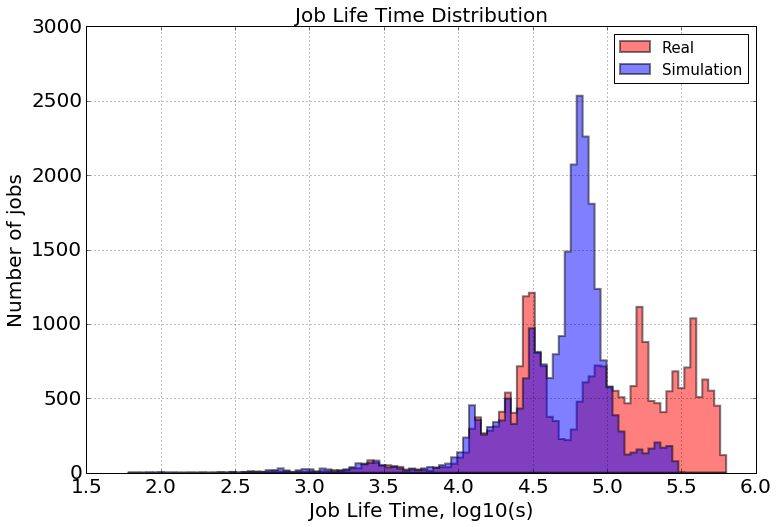

In [11]:
jtp.job_life_time()

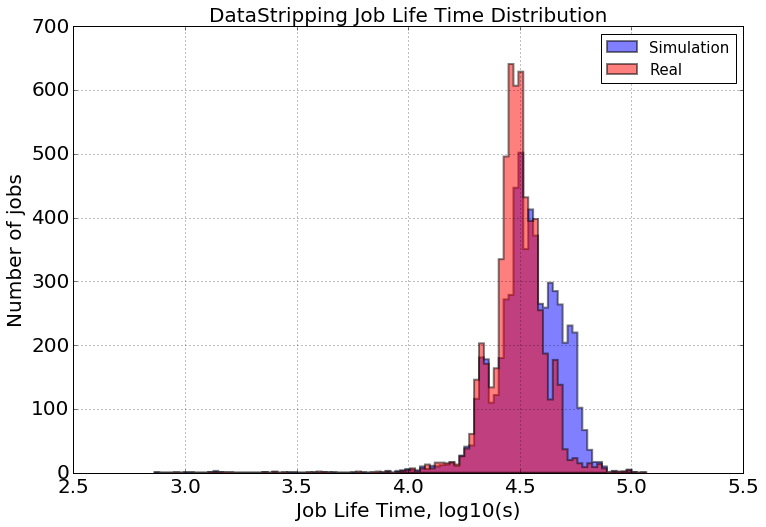

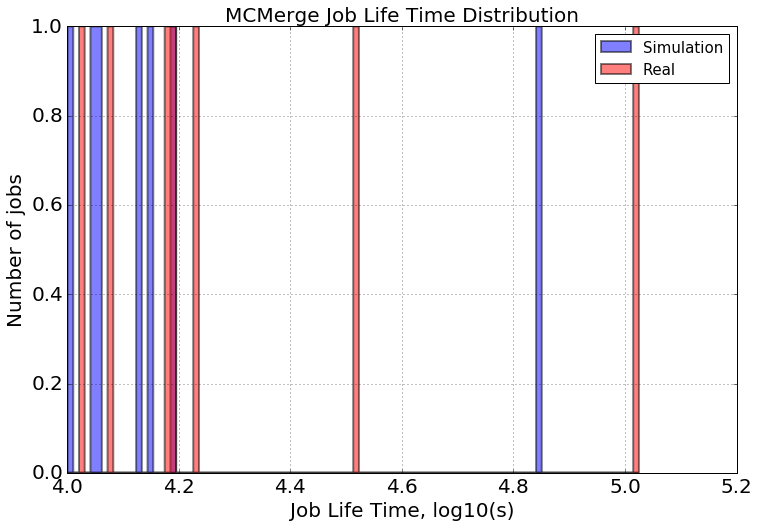

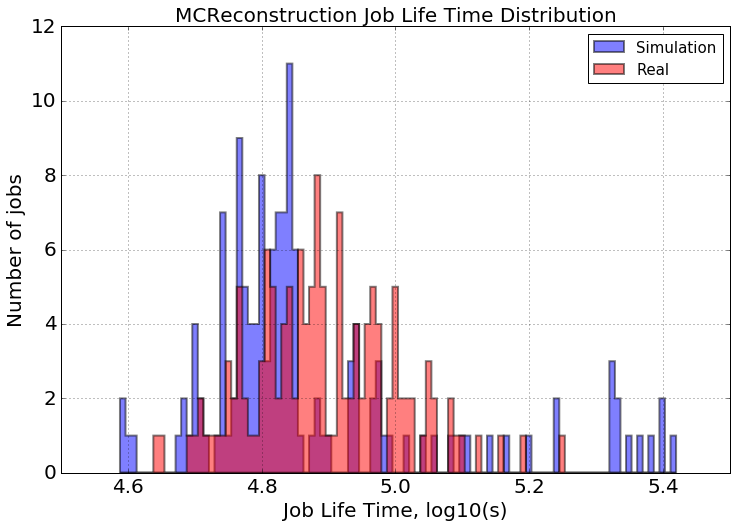

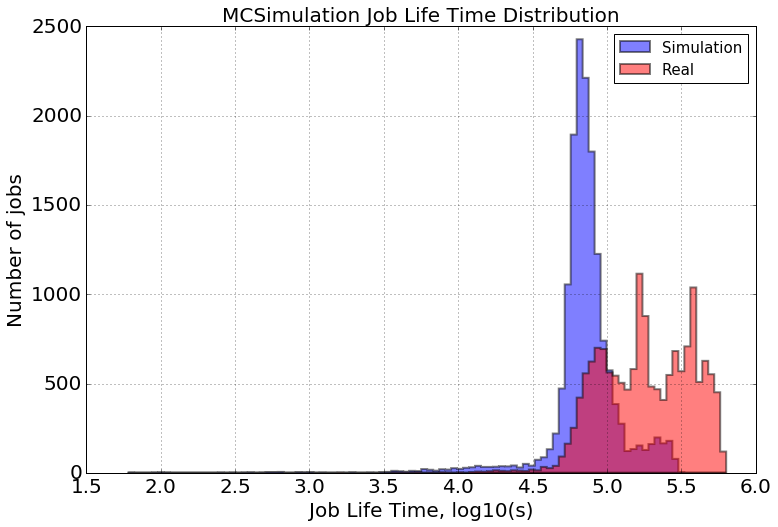

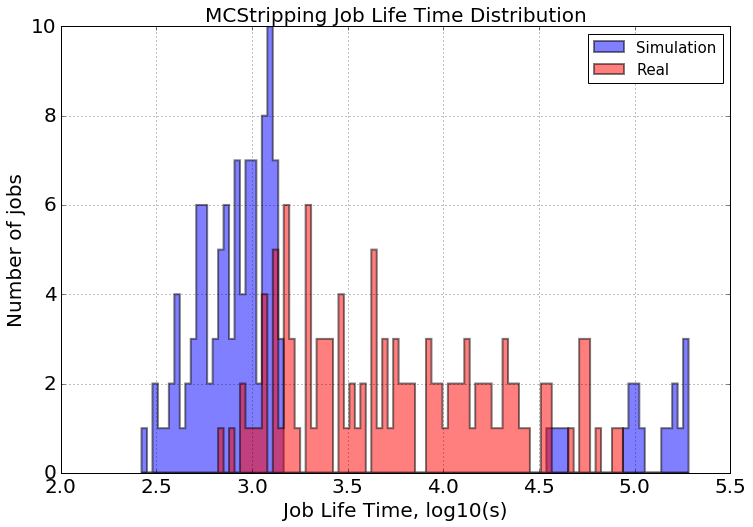

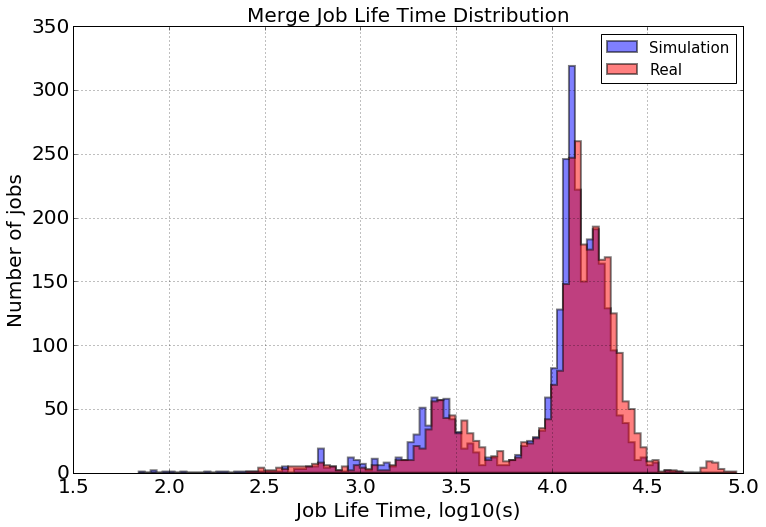

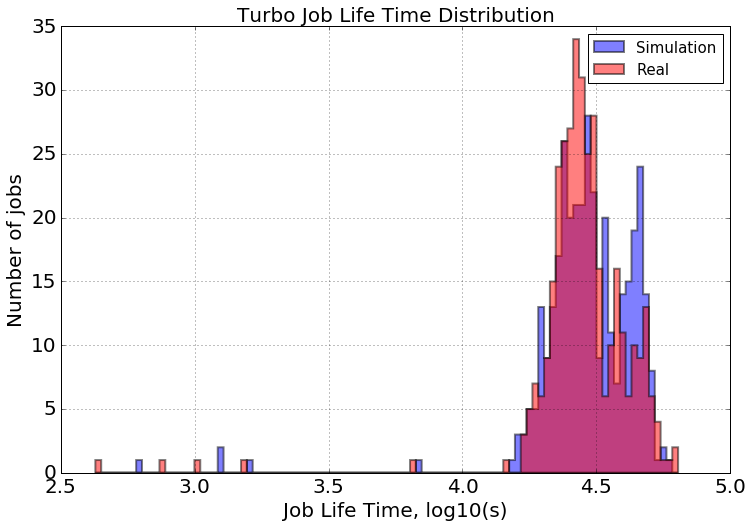

In [12]:
jtp.job_life_time_by_jobtype()

# Read Simulation Trace Data

In [13]:
sim_trace_data = pandas.read_csv("data/simulation/trace.csv", header=None, sep=', ')
sim_trace_data.columns = ['Nothing', 'Object', 'Variable', 'StartObservTime', 'EndObservTime', 'ObservTime', 'VarValue']
sim_trace_data.head(10)

,Nothing,Object,Variable,StartObservTime,EndObservTime,ObservTime,VarValue
0,Variable,3-Tier2_16,bandwidth,0,412274.069519,412274.069519,1000000000
1,Variable,3-Tier2_16,latency,0,412274.069519,412274.069519,0
2,Variable,3-Tier2_16,traffic,0,412274.069519,412274.069519,0
3,Variable,3-Tier2_16,directUserAmount,0,412274.069519,412274.069519,0
4,Variable,3-Tier2_16,indirectUserAmount,0,412274.069519,412274.069519,0
5,Variable,3-Tier2_15,bandwidth,0,412274.069519,412274.069519,1000000000
6,Variable,3-Tier2_15,latency,0,412274.069519,412274.069519,0
7,Variable,3-Tier2_15,traffic,0,412274.069519,412274.069519,0
8,Variable,3-Tier2_15,directUserAmount,0,412274.069519,412274.069519,0
9,Variable,3-Tier2_15,indirectUserAmount,0,412274.069519,412274.069519,0


In [14]:
numpy.unique(sim_trace_data.Object.values)

array(['0-Tier2_1', '0-Tier2_10', '0-Tier2_11', '0-Tier2_12', '0-Tier2_13',
       '0-Tier2_14', '0-Tier2_15', '0-Tier2_16', '0-Tier2_2', '0-Tier2_3',
       '0-Tier2_4', '0-Tier2_5', '0-Tier2_6', '0-Tier2_7', '0-Tier2_8',
       '0-Tier2_9', '1-Tier2_1', '1-Tier2_10', '1-Tier2_11', '1-Tier2_12',
       '1-Tier2_13', '1-Tier2_14', '1-Tier2_15', '1-Tier2_16', '1-Tier2_2',
       '1-Tier2_3', '1-Tier2_4', '1-Tier2_5', '1-Tier2_6', '1-Tier2_7',
       '1-Tier2_8', '1-Tier2_9', '2-Tier2_1', '2-Tier2_10', '2-Tier2_11',
       '2-Tier2_12', '2-Tier2_13', '2-Tier2_14', '2-Tier2_15',
       '2-Tier2_16', '2-Tier2_2', '2-Tier2_3', '2-Tier2_4', '2-Tier2_5',
       '2-Tier2_6', '2-Tier2_7', '2-Tier2_8', '2-Tier2_9', '3-Tier2_1',
       '3-Tier2_10', '3-Tier2_11', '3-Tier2_12', '3-Tier2_13',
       '3-Tier2_14', '3-Tier2_15', '3-Tier2_16', '3-Tier2_2', '3-Tier2_3',
       '3-Tier2_4', '3-Tier2_5', '3-Tier2_6', '3-Tier2_7', '3-Tier2_8',
       '3-Tier2_9', '4-Tier2_1', '4-Tier2_10', '4-Tier2_11', '

In [15]:
numpy.unique(sim_trace_data.Variable.values)

array(['CERN-PROD-DISK', 'CERN-PROD-TAPE', 'CH-CHIPP-CSCS-DISK',
       'CH-CHIPP-CSCS-TAPE', 'DE-DESY-LHCB-DISK', 'DE-DESY-LHCB-TAPE',
       'ES-LHCb-T2-DISK', 'ES-LHCb-T2-TAPE', 'FR-GRIF-DISK',
       'FR-GRIF-TAPE', 'FR-IN2P3-CPPM-DISK', 'FR-IN2P3-CPPM-TAPE',
       'FR-IN2P3-LAPP-DISK', 'FR-IN2P3-LAPP-TAPE', 'FR-IN2P3-LPC-DISK',
       'FR-IN2P3-LPC-TAPE', 'FZK-LCG2-DISK', 'FZK-LCG2-TAPE',
       'IN2P3-CC-DISK', 'IN2P3-CC-TAPE', 'INFN-T1-DISK', 'INFN-T1-TAPE',
       'IT-INFN-T2-DISK', 'IT-INFN-T2-TAPE', 'NIKHEF-ELPROD-DISK',
       'NIKHEF-ELPROD-TAPE', 'NRC-KI-T1-DISK', 'NRC-KI-T1-TAPE',
       'PL-TIER2-WLCG-DISK', 'PL-TIER2-WLCG-TAPE', 'RAL-LCG2-DISK',
       'RAL-LCG2-TAPE', 'RO-LCG-DISK', 'RO-LCG-TAPE', 'RU-RDIG-DISK',
       'RU-RDIG-TAPE', 'T2-LATINAMERICA-DISK', 'T2-LATINAMERICA-TAPE',
       'UK-London-Tier2-DISK', 'UK-London-Tier2-TAPE', 'UK-NorthGrid-DISK',
       'UK-NorthGrid-TAPE', 'UK-ScotGrid-DISK', 'UK-ScotGrid-TAPE',
       'UK-SouthGrid-DISK', 'UK-SouthGrid-TA

# Traffic Plots

In [16]:
from figures import TrafficPlots
tp = TrafficPlots(sim_trace_data)

### LHCOPN Data Transfer Plots

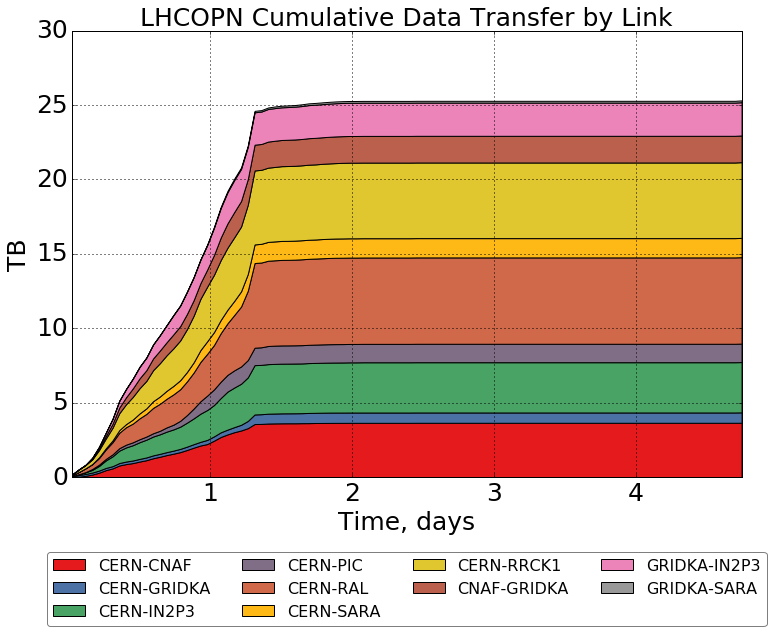

In [17]:
tp.lhcopn_cumulative_data_transfer()

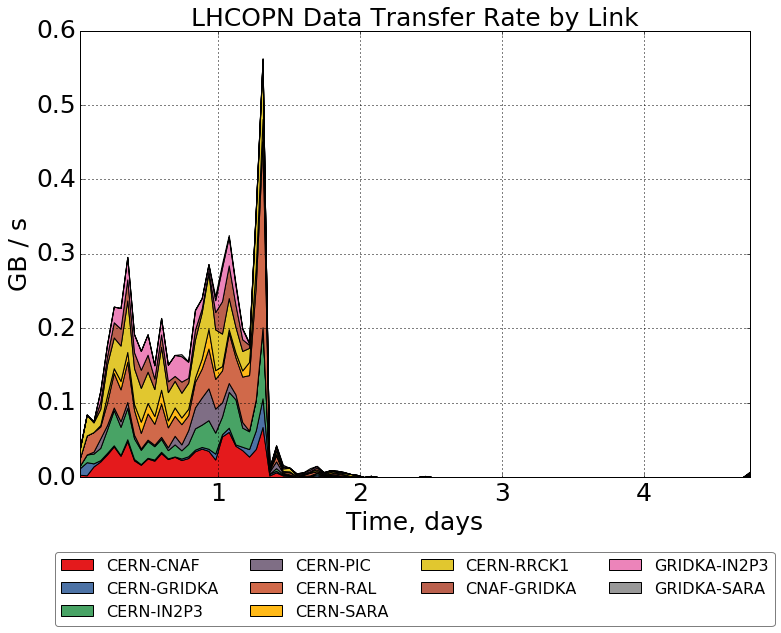

In [18]:
tp.lhcopn_data_transfer_rate()